In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from nltk.corpus import stopwords
from nltk.corpus import RegexpTokenizer
import string


# Reading Files

In [160]:
def readFiles():
    df1=pd.read_csv('Kunal_dinesh_data_without_stop_words.csv')
    df2=pd.read_csv('Kritika_data_without_stop_words.csv')
    df3=pd.read_csv("Rishab_data_without_stop_words.csv")
#     df4=pd.read_csv("prateeks_data_without_stop_words.csv")
    df5=pd.read_csv("Garima_data_without_stop_words.csv")
    
    tweet_id=pd.concat([df1.tweet_id,df2.tweet_id,df3.tweet_id,df5.tweet_id])
    tweet_text=pd.concat([df1.tweet_text,df2.tweet_text,df3.tweet_text,df5.tweet_text])
    created_at=pd.concat([df1.created_at,df2.created_at,df3.created_at,df5.created_at])
    country=pd.concat([df1.country,df2.country,df3.country,df5.country])
    city=pd.concat([df1.city,df2.city,df3.city,df5.city])
    language=pd.concat([df1.language,df2.language,df3.language,df5.language])
    likes_count=pd.concat([df1.likes_count,df2.likes_count,df3.likes_count,df5.likes_count])
    retweet_count=pd.concat([df1.retweet_count,df2.retweet_count,df3.retweet_count,df5.retweet_count])
    hashtags=pd.concat([df1.hashtags,df2.hashtags,df3.hashtags,df5.hashtags])
    
#     print(df1.tweet_text.iloc[0][0])
#     print(df2.tweet_text.iloc[0][0])
#     print(df3.tweet_text.iloc[0][0])
# #     print(type(df1.tweet_text.iloc[0]))
#     print(df5.tweet_text.iloc[0][0])
    resultingDataFrame=pd.DataFrame()
    resultingDataFrame['tweet_id']=np.array(tweet_id)
    resultingDataFrame['tweet_text']=np.array(tweet_text)
    resultingDataFrame['created_at']=np.array(created_at)
    resultingDataFrame['country']=np.array(country)
    resultingDataFrame['city']=np.array(city)
    resultingDataFrame['language']=np.array(language)
    resultingDataFrame['likes_count']=np.array(likes_count)
    resultingDataFrame['retweet_count']=np.array(retweet_count)
    resultingDataFrame['hashtags']=np.array(hashtags)

    return resultingDataFrame


In [161]:
whole_tweet_data=readFiles()
whole_tweet_data.head(n=1)

,tweet_id,tweet_text,created_at,country,city,language,likes_count,retweet_count,hashtags
0,1197881970484826112,"['hafta', 'sonunu', 'rahat', 'geçirmek', 'için...",Fri Nov 22 14:18:11 +0000 2019,France,Bouy-Luxembourg,tr,16,0,[]


## Basic Analysis of Information

In [162]:
whole_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923015 entries, 0 to 1923014
Data columns (total 9 columns):
tweet_id         int64
tweet_text       object
created_at       object
country          object
city             object
language         object
likes_count      int64
retweet_count    int64
hashtags         object
dtypes: int64(3), object(6)
memory usage: 132.0+ MB


<class 'str'>


In [164]:
whole_tweet_data.to_csv('final_csv_1.csv')

### <font color='purple'> Visualizing Tweets Per Day</font>

In [165]:
# Slicing the Dates from the Column created_at irrespective of timestamp
dates=whole_tweet_data.created_at.str.slice(0,10,1)
sliced_dates=pd.DataFrame(np.array(dates),columns=['Dates_sliced'])

# Updating the DataFrame with the sliced dates at the end for analysis.
whole_tweet_data=whole_tweet_data.join(sliced_dates)
whole_tweet_data.head()



,tweet_id,tweet_text,created_at,country,city,language,likes_count,retweet_count,hashtags,Dates_sliced
0,1197881970484826112,"['hafta', 'sonunu', 'rahat', 'geçirmek', 'için...",Fri Nov 22 14:18:11 +0000 2019,France,Bouy-Luxembourg,tr,16,0,[],Fri Nov 22
1,1198881981993500672,"['gmuecke', 'geraederterdan', 'andreasschliep'...",Mon Nov 25 08:31:53 +0000 2019,Luxembourg,Leudelange,de,0,0,[],Mon Nov 25
2,1198879239581425664,"['geraederterdan', 'andreasschliep', 'ich', 'm...",Mon Nov 25 08:20:59 +0000 2019,Luxembourg,Leudelange,de,0,0,[],Mon Nov 25
3,1198878788257566720,"['flabbygasted', 'tulog', 'ka', 'ate', 'daming...",Mon Nov 25 08:19:11 +0000 2019,Luxembourg,Strassen,tl,0,0,[],Mon Nov 25
4,1198875302895783938,"['blueicedc03', 'makareklamo', 'ko', 'mura', '...",Mon Nov 25 08:05:20 +0000 2019,Luxembourg,Bertrange,tl,1,0,[],Mon Nov 25


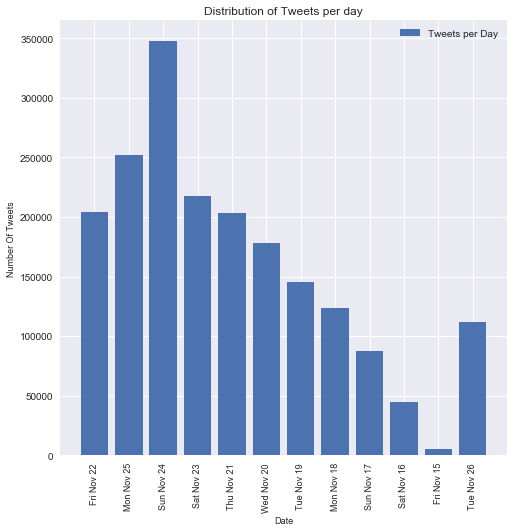

In [166]:
# Creating the group of dataframe datewise
Day_group=whole_tweet_data.groupby(whole_tweet_data['Dates_sliced'])

#Selecting the unique dates from the dataframe
unique_dates=whole_tweet_data.Dates_sliced.unique()

#Creating an empty array to store the number of tweet count
number_of_tweets_per_day=[]

#Selecting each day from the above created group of days and calculating the total length of the dataframe which will
#which will eventually return the number of tweets on that day too. 
for day in unique_dates[0:-1]:
    number_of_tweets_per_day.append(len(Day_group.get_group(day)))
unique_dates=unique_dates[0:-1]

# plotting the distribution using bar graph
index=np.arange(len(unique_dates))
plt.figure(figsize=(8,8))
plt.style.use('seaborn')

# this is similar to f(x)=y where f(x)=index and y is number of tweets from array
plt.bar(index, number_of_tweets_per_day,label="Tweets per Day")
plt.xlabel('Date', fontsize=9)
plt.ylabel('Number Of Tweets', fontsize=9)
plt.xticks(index, unique_dates, fontsize=9, rotation='vertical')
plt.title('Distribution of Tweets per day')
plt.legend()
plt.show()

### <font color='purple'>Language Distribution</font>

In [167]:
# since we fetched the language of the tweet while collecting the data
# created pandas group of the language which will in return the group of dataframe wrt to languages.
language_group=whole_tweet_data.groupby(whole_tweet_data["language"])

# since multiple tweets can be written in same language, so we need to select the the unique languages from all the rows of 
# the dataframe.
languages=whole_tweet_data.language.unique()

# It is observed the total number of distinguished languages are 60 in this data.
print("Total number of Differnt Languages %d"%len(languages))

# printing the languages
print(languages)

Total number of Differnt Languages 60
['tr' 'de' 'tl' 'en' 'und' 'da' 'fr' 'sl' 'nl' 'ht' 'th' 'ar' 'pt' 'es'
 'el' 'pl' 'in' 'it' 'ru' 'no' 'ja' 'et' 'sv' 'fi' 'ca' 'lv' 'ro' 'hi'
 'eu' 'bg' 'is' 'lt' 'fa' 'vi' 'cy' 'cs' 'hu' 'ko' 'zh' 'iw' 'uk' 'mr'
 'ur' 'am' 'ne' 'sr' 'ml' 'si' 'ta' 'te' 'gu' 'ckb' 'kn' 'bn' 'my' 'ps'
 'km' 'pa' 'bo' 'hy']


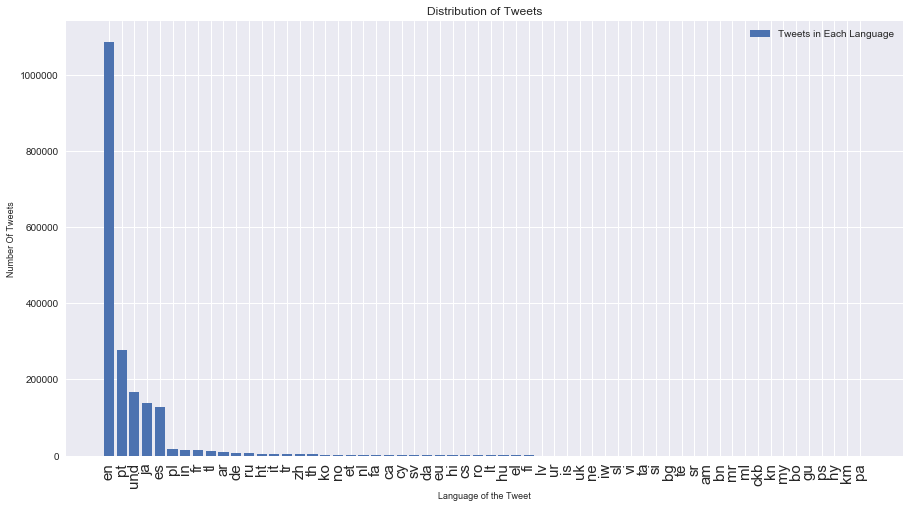

In [168]:
# array that will store the tweet count in each language eventually.
number_of_tweets_in_each_language=[]

# for each language from lagnauge group created, calculating the length of that group and 
# appending in the array in the from of tupple(x,y) where x= language id  and y is the length of that group
for l in languages:
    number_of_tweets_in_each_language.append((l,len(language_group.get_group(l))))

# Sorting the array according to the number of tweets in each language.
number_of_tweets_in_each_language.sort(key=lambda x: x[1], reverse=True)

# appending the x=language in languages array and reassigning the tweet count to initial array.
for i in range(0,len(number_of_tweets_in_each_language)):
    languages[i]=number_of_tweets_in_each_language[i][0] # 0th index in the array x[(a,b),..], x[0][0]=a=>language
    number_of_tweets_in_each_language[i]=number_of_tweets_in_each_language[i][1]# 1st index in the array x[(a,b),..], x[0][1]=b=>tweet count
    
# Plotting the distribution of tweets in each language using matplotlib.    
index=np.arange(len(languages))
plt.figure(figsize=(15,8))
plt.style.use('seaborn')
plt.bar(index, number_of_tweets_in_each_language,label="Tweets in Each Language")
plt.xlabel('Language of the Tweet', fontsize=9)
plt.ylabel('Number Of Tweets', fontsize=9)
plt.xticks(index, languages, fontsize=15, rotation='vertical')
plt.title('Distribution of Tweets')
plt.legend()
plt.show()

### <font color='purple'>Sentiment and Subjectivity Analysis</font>

In [178]:
# this library is used to convert string into list for operations
import ast

# textblob library is used for calculating the sentiment value in each tweet in english
from textblob.sentiments import PatternAnalyzer

#initializing object
sentiment_analyzer=PatternAnalyzer()

# this will join the tokens in the list and return them as string 
def join_tokens(tokens):
    return " ".join(tokens)

# selecting the part of dataframe, in which tweets are written in english language only.
temp=whole_tweet_data[whole_tweet_data.language=='en']

# initialzing the array for storing the sentiment value of the tweets
sentiment_1=[]
#initializing the array for storing the subjectivity value of the tweets.
subjectivity_1=[]

#initializing the array such that for f(x)=y, a graph will be plottet where x represents tweet number
# and y represents either sentiment or subjectivity value
numlist=[]

#iterating over the newly created dataframe of english tweets.
for i in range(0,len(temp)):
    #Since textblob works on the string, so this will return the string out of a list of tokens 
    t=ast.literal_eval(temp.tweet_text.iloc[i])
    
    #Sentiment analyzer returns two values, 1st represent sentiment value and 2nd represents subjectivity of the tweet
    sentiment_1.append(sentiment_analyzer.analyze(t)[0])
    subjectivity_1.append(sentiment_analyzer.analyze(t)[1])
    
    #appending the tweet number in the numlist array
    numlist.append(num)
    num=num+1

# creating numpy array for plotting the scatter plot
sentiment_1=np.array(sentiment_1)
subjectivity_1=np.array(subjectivity_1)


#### <font color='darkgreen'>Sentiment Polarity Scatter Plot</font>

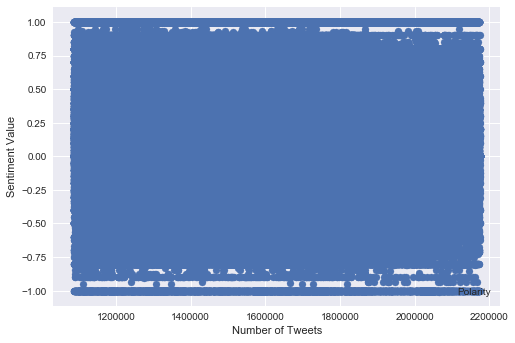

In [179]:
# Scatter plot of the sentiment value of all the tweets.
plt.style.use('seaborn')
plt.scatter(numlist,sentiment_1,label='Polarity')
plt.xlabel('Number of Tweets')
plt.ylabel('Sentiment Value')
plt.legend()

#### <font color='darkgreen'>Subjectivity Polarity Scatter Plot</font>

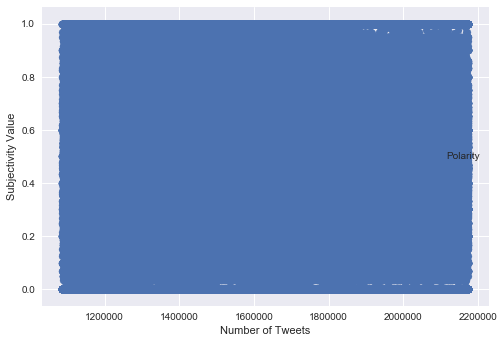

In [180]:
# Scatter plot of subjectivity on the scale of 0 to 1 of all the tweets.
plt.style.use('seaborn')
plt.scatter(numlist,subjectivity_1,label='Polarity')
plt.xlabel('Number of Tweets')
plt.ylabel('Subjectivity Value')
plt.legend()

#### <font color='darkgreen'>Different Types of Sentiments</font>


c:\users\kunalverma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\kunalverma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


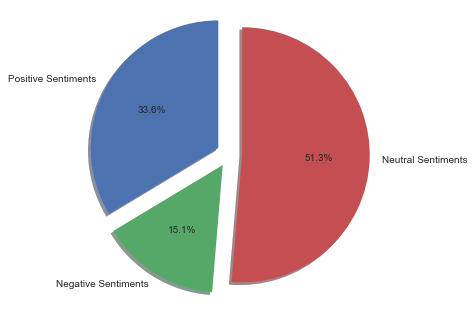

In [186]:
# apeending the new coloumns to the temporary dataframe for all the sentiment vlues and subjectivity values.
temp['sentiment_value']=sentiment_1
temp['subjectivity_value']=subjectivity_1

# Assigning the new dataframe to a variable in which sentiments are greater then 0.0 
positive_sentiment_count=temp[temp['sentiment_value']>0.0]

# Assigning the new dataframe to a variable in which sentiments are smaller then 0.0 
negative_sentiment_count=temp[temp['sentiment_value']<0.0]

# Assigning the new dataframe to a variable in which sentiments are equal to 0.0
neutral_sentiment_count=temp[temp['sentiment_value']==0.0]

# This was the code for plotting the bar plot of the positive, negative and neutral sentiments in the tweets.

    """
    temp_array=[len(positive_sentiment_count),len(negative_sentiment_count),len(neutral_sentiment_count)]
    x_axis_labels=['Positive_sentiment','Negative_sentiment','Neutral_sentiment']
    plt.xlabel("Sentiments")
    plt.ylabel("Number of Tweets")
    plt.bar(x_axis_labels,temp_array,color=('green','red','blue'),width=(0.2,0.2,0.2))
    """

# Creating labels of the pie chart that will represetns the folowwing.    
labels = ['Positive Sentiments', 'Negative Sentiments', 'Neutral Sentiments']

# creating the sectors of the pie chart where each sector represents some percentage of the total value
# eg. (x*100)/(x+y+z)
sizes = [len(positive_sentiment_count)*100/(len(positive_sentiment_count)+len(negative_sentiment_count)+len(neutral_sentiment_count)),
         len(negative_sentiment_count)*100/(len(positive_sentiment_count)+len(negative_sentiment_count)+len(neutral_sentiment_count)),   
         len(neutral_sentiment_count)*100/(len(positive_sentiment_count)+len(negative_sentiment_count)+len(neutral_sentiment_count))
        ]
# this will explode the chart outwards to a certain amount of degree
explode = (0.1,0.1, 0.1)  # "explode" the all slices 

# plotting the chart for each type of sentiment.
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

#### <font color='darkgreen'>Subjective or Factual ??</font>


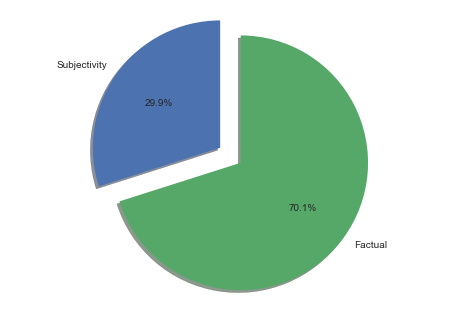

In [188]:
## These rates are assigned manually (Assumption)
subjectivity_count=temp[temp['subjectivity_value']>0.5]
factual_count=temp[temp['subjectivity_value']<0.5]

        """
        temp_array=[len(subjectivity_count),len(factual_count)]
        x_axis_labels=['Subjectivity Count','Factual Count']
    
        plt.xlabel("Number Of Tweets")
        plt.ylabel("Subjectivity")
        
        """

# Similar to the sentiment pie chart.    
plt.bar(x_axis_labels,temp_array,color=('green','red'),width=(0.2,0.2))

labels = ['Subjectivity', 'Factual']
sizes = [len(subjectivity_count)*100/(len(subjectivity_count)+len(factual_count)),
        len(factual_count)*100/(len(subjectivity_count)+len(factual_count))
        ]
explode = (0.1,0.1)  # "explode" the all slices 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()


#### <font color='darkgreen'>Interest Topic in Tweets</font>


In [193]:
# This code will return the number of positive, negative and neutral sentiments in the specific topic fed to the function.
# Initializing array for appending the number of positive, negative and neutral sentiments in the tweet regarding something.
avg_pos=[]
avg_neg=[]
avg_net=[]

tiktok=[]
# the loop is converting the token string into the list of tokens and then joining all the tokens
for i in range(0,len(temp)):
    t1=join_tokens(ast.literal_eval(temp.tweet_text.iloc[i]))
    tiktok.append(t1)

tiktok=np.array(tiktok)

#appending the new column to temporary dataframe.
temp['tiktok']=tiktok
temp.tiktok.head()



c:\users\kunalverma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


5                              runestenconsult fin tone
14                   andylong davehill56 porcupine well
15          dayerisun ice0fox top band guys listen live
19    good morning luxembourg sunrise 0802 noon 1222...
20                                  hoetoevallig succes
Name: tiktok, dtype: object

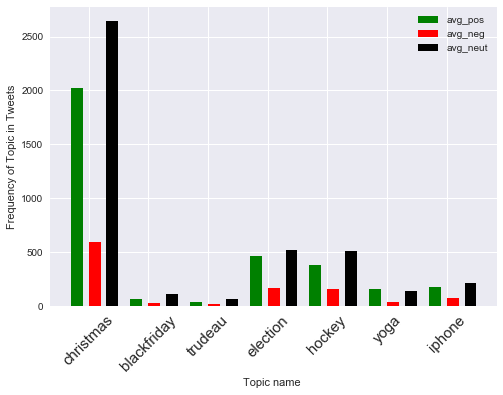

In [211]:
# Defining some of the trending topics that might occur in tweets.
features=['','christmas','blackfriday','trudeau','election','hockey','yoga','iphone']
#Creating an array for indexing.
x=np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0])

#iterating over the feature loop
for feature in features:
    #assigning the dataframe that contains the topic in the tweet text.
    tik=temp[temp.tiktok.str.contains(feature)]
    
    #Calculating the length of sentiment value of the tweet containing the topic
    avg_pos.append(len(tik[tik.sentiment_value>0.0]))
    avg_net.append(len(tik[tik.sentiment_value==0.0]))
    avg_neg.append(len(tik[tik.sentiment_value<0.0]))

w=0.2

#Plotting the bar graph for each number of positive, negative and neutral sentiment.
fig,ax=plt.subplots()
plt.bar(x-0.2,avg_pos,color='green',width=(0.2),label='avg_pos')
plt.bar(x+0.1,avg_neg,color='red',width=(0.2),label='avg_neg')
plt.bar(x+0.4,avg_net,color='black',width=0.2,label='avg_neut')
plt.xticks(rotation=45)
plt.ylabel("Frequency of Topic in Tweets")
plt.xlabel("Topic name ")
ax.set_xticklabels(features, fontsize=15)
plt.legend(loc='best')

## Word Cloud for frequently used words in Tweets

In [226]:
#importing library for generating wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#creating a temporary dataframe for operation
newdf_1=tempf.tiktok_1

#since wordcloud works on the string so joining all the text values into one single large string.
var=np.array(newdf_1)
var1=" ".join(var)

(-0.5, 1023.5, 577.5, -0.5)

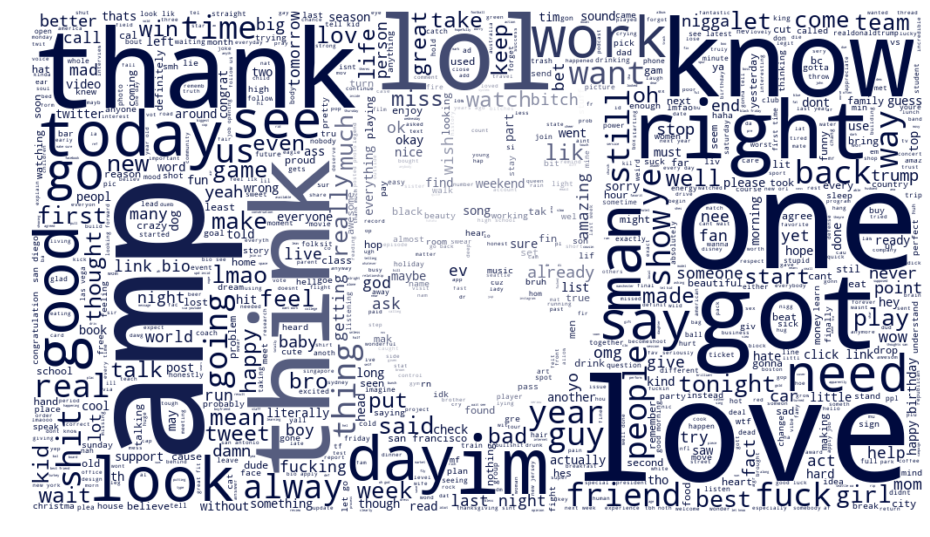

In [227]:
#wordcloud operations.
# importing PIL labrary for reading images
from PIL import Image

#importing requests library for getting image from the internet
import requests

# io library for input output operations on the file
from io import BytesIO

# getting the image from the internet.
response = requests.get("https://live.staticflickr.com/8027/29016431894_2f218cea36_b.jpg")

#reading then binary representation of the image and converting them into numpy array.
mask = np.array(Image.open(BytesIO(response.content)))

#Generating the wordcloud out of the text
wordcloud_fra = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(var1)

# create coloring from image
image_colors = ImageColorGenerator(mask)

#Plotting
plt.figure(figsize=[16,16])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

## After Removing most frequently occured words.

In [306]:
# remove sparse words - removing words that are not in stop words but are frequently used
other_common_words =["thankyou", "love","thank", "lol", "today","want","need","still","make","away","always","one", "two","three"]

# the function is used for removing sparse words from the tokenized text
def remove_parse_words(tokenized_text, other_common_words):
    tokenized_text=[w for w in tokenized_text if w not in other_common_words]
    return tokenized_text

#temporary dataframe for operation on the tweets that are written in english
newdf=temp[temp.language=='en']
ticktok_2=[]

# generating the list of the tokens out of token string.
for i in range(0,len(newdf)):
    t1=ast.literal_eval(newdf.tweet_text.iloc[i])
    ticktok_2.append(t1)
ticktok_2=np.array(ticktok_2)

#appending new columns of the token list for the operation
newdf['ticktok_2']=ticktok_2
    

# newdf.tweet_text=newdf.tweet_text.apply(lambda tokenized_text:remove_parse_words(tokenized_text, other_common_words))

In [308]:
# Removing the sparse words from the newly added token list in the dataframe.
newdf.ticktok_2=newdf.ticktok_2.apply(lambda tokenized_text:remove_parse_words(tokenized_text, other_common_words))

In [309]:
# Converting the tokens back to the string of tokens.
ticktok_3=[]
for i in range(0,len(newdf)):
    t1=join_tokens(newdf.ticktok_2.iloc[i])
    ticktok_3.append(t1)
newdf['ticktok_3']=ticktok_3

In [311]:
# joining all the strings for the word cloud operations
var=np.array(newdf.ticktok_3)
var1=" ".join(var)

(-0.5, 1023.5, 577.5, -0.5)

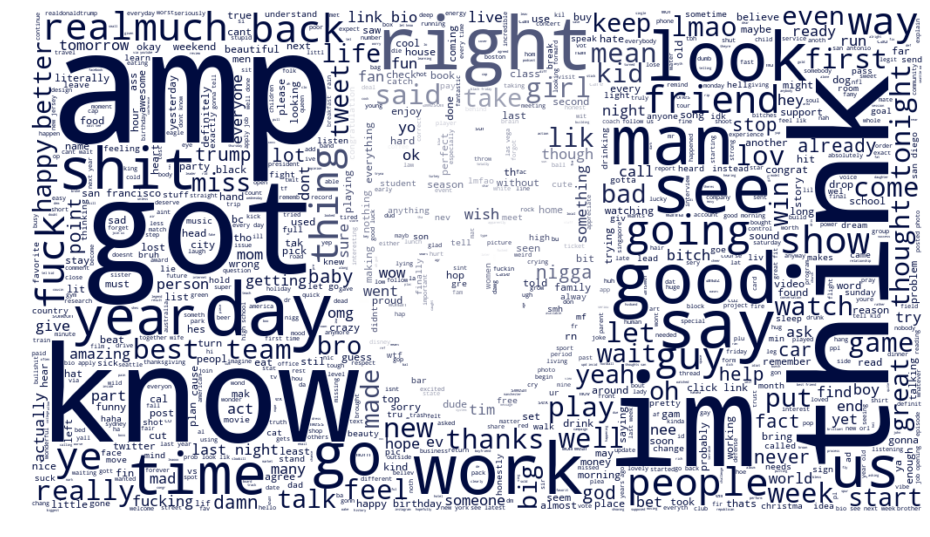

In [312]:
# the code is same as above.
wordcloud_fra = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(var1)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[16,16])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

## Countriwise Analysis

In [284]:
# Selecting unique countries where tweets are written in english
unique_countries=temp.country.unique()
#Creating numpy array for operations
unique_countries=np.array(unique_countries)
#printing the list of the countries
print(unique_countries)
#Initialising arrays for the number of positive,negative and neutral sentiment tweets.
avg_neg_1=[]
avg_pos_1=[]
avg_net_1=[]
# For each country from the group, calculating the length of positive, negative and neutral sentiments and appending 
# the respective arrays for operations 
for country in unique_countries:
    tik=temp[temp.country==country]
    avg_pos_1.append(len(tik[tik.sentiment_value>0.0]))
    avg_net_1.append(len(tik[tik.sentiment_value==0.0]))
    avg_neg_1.append(len(tik[tik.sentiment_value<0.0]))

['Luxembourg' 'United States' 'France' 'Canada' 'Republic of Korea'
 'Republic of the Philippines' 'Indonesia' 'Japan' 'United Kingdom'
 'Italy' 'Germany' 'Australia' 'South Africa' 'Norway' 'Mexico'
 'Singapore' 'Argentina' 'Chile' 'Spain' 'Portugal' 'Colombia'
 'Czech Republic' "People's Republic of China" 'Poland' 'Ireland'
 'Thailand' 'Hong Kong' 'Brazil' 'Switzerland' 'Russia' 'Austria'
 'New Zealand']


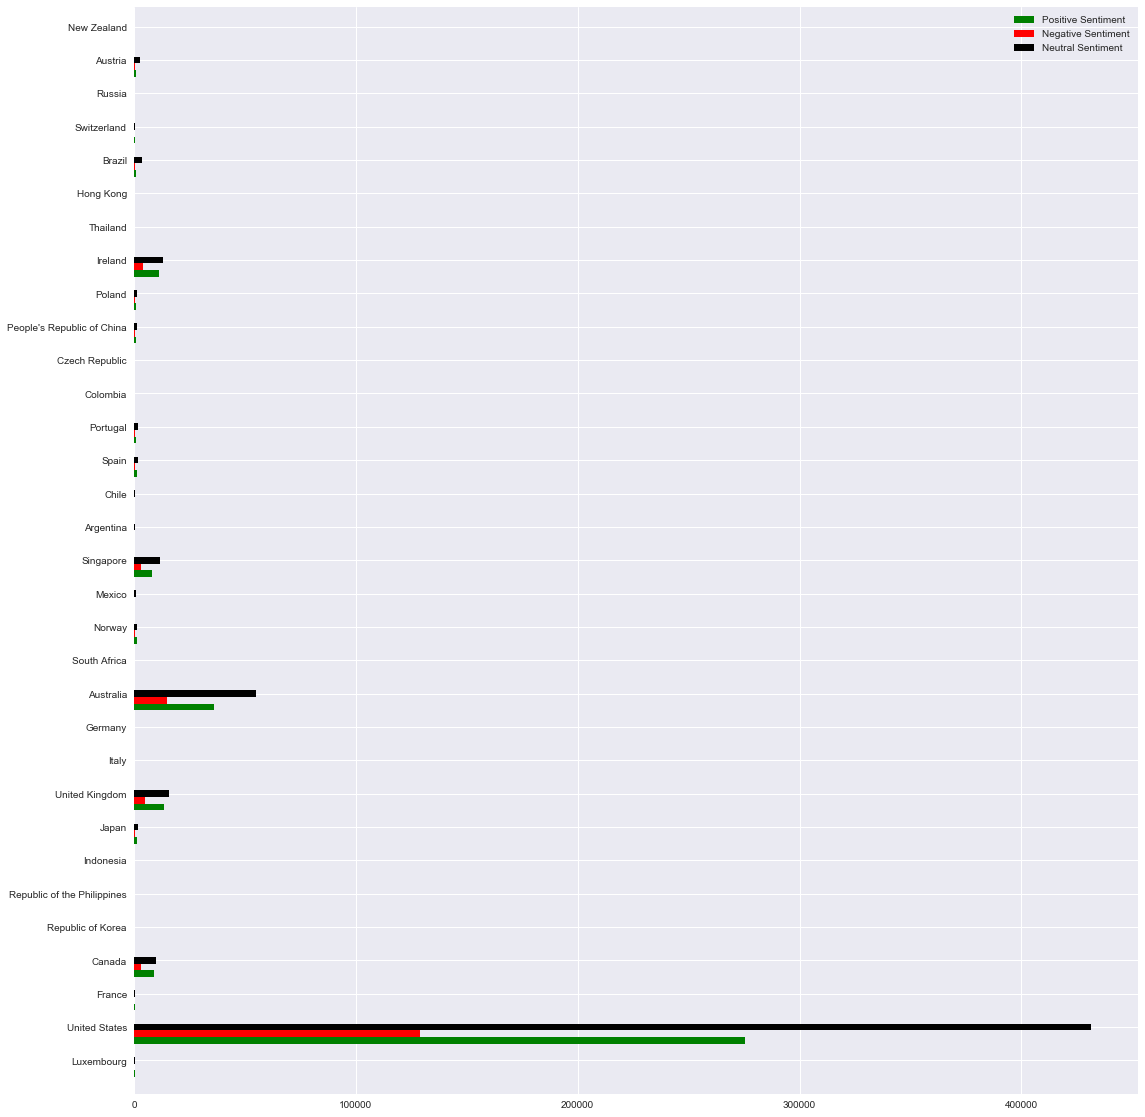

In [293]:
#Plotting the horizontal bar graph 
ind = np.arange(len(unique_countries))
width = 0.2
fig, ax = plt.subplots(figsize=(18,20))
ax.barh(ind, avg_pos_1, width, color='green', label='Positive Sentiment')
ax.barh(ind + width, avg_neg_1, width, color='red', label='Negative Sentiment')
ax.barh(ind + width + width, avg_net_1, width, color='black', label='Neutral Sentiment')
ax.set(yticks=ind + width + width, yticklabels=unique_countries, ylim=[2*width - 1, len(unique_countries)])
ax.legend()
plt.show()

[('Hungary', 1), ('Italy', 8), ('New Zealand', 12), ('Czech Republic', 139), ('Republic of the Philippines', 241), ('Hong Kong', 273), ('South Africa', 344), ('Thailand', 598), ('Colombia', 1209), ('Luxembourg', 1752), ('Germany', 1923), ('Republic of Korea', 2359), ('Indonesia', 3581), ('Switzerland', 3604), ('Russia', 6641), ('Norway', 6951), ("People's Republic of China", 9184), ('France', 9204), ('Austria', 12372), ('Mexico', 14971), ('Portugal', 19734), ('Chile', 22140), ('Poland', 22654), ('Canada', 26873), ('Argentina', 33356), ('Singapore', 35780), ('Ireland', 37897), ('United Kingdom', 41235), ('Spain', 44742), ('Australia', 136681), ('Japan', 140444), ('Brazil', 296695), ('United States', 985463)]


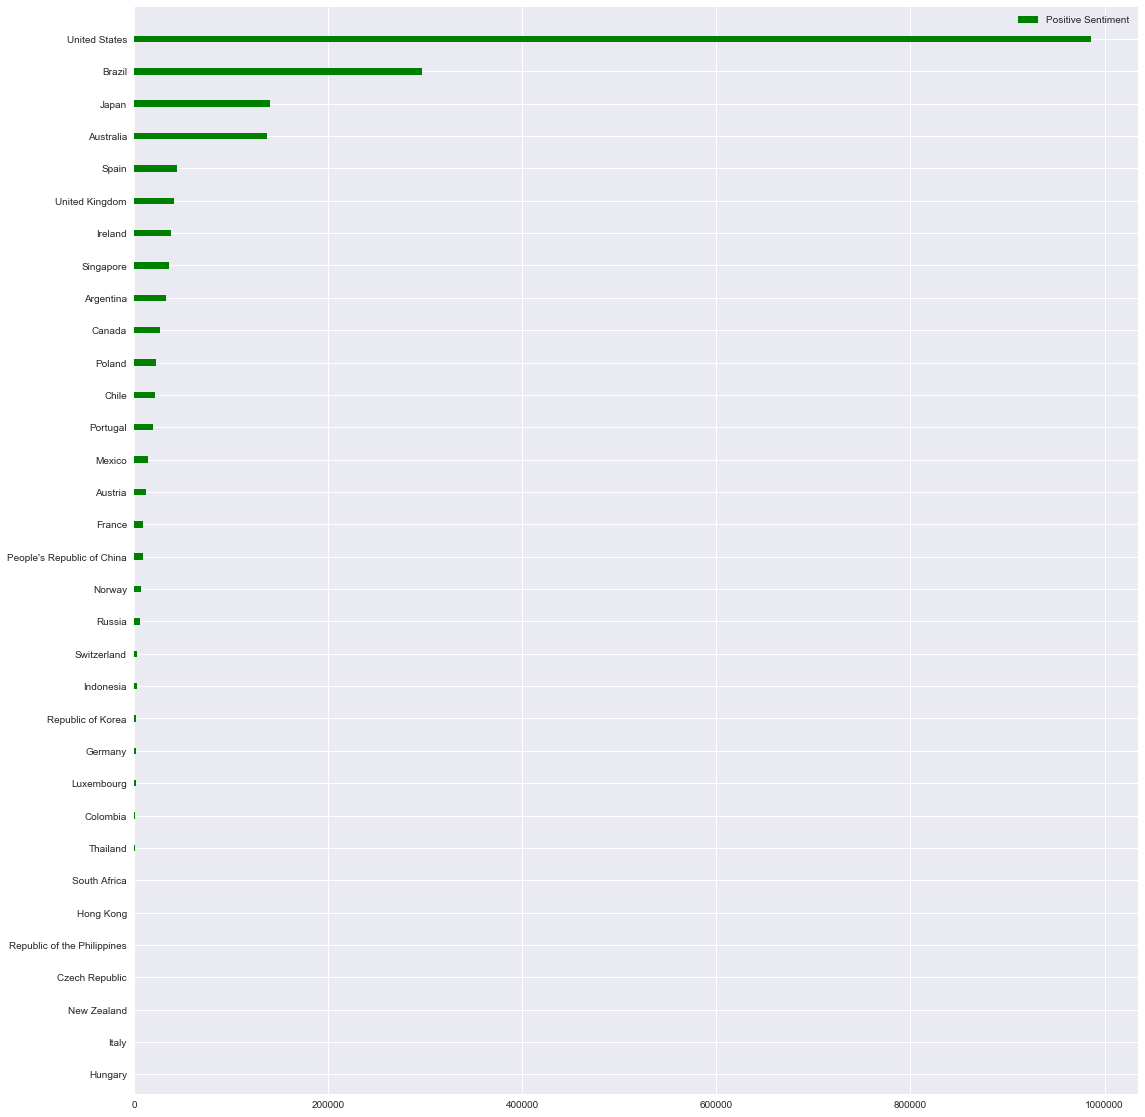

In [330]:
# For Calculating the total number of tweets from each country
# Selecting the unique countries
unique_countries=whole_tweet_data.country.unique()
unique_countries=np.array(unique_countries)
# print(unique_countries)
number_of_tweets=[]

# For each country in the unique country list, calculating the length of df for that country.
for country in unique_countries:
    tik=whole_tweet_data[whole_tweet_data.country==country]
    number_of_tweets.append((country,len(tik)))
    
# print(number_of_tweets)

#Sorting the list of tuples x[(a,b)] wrt to number of tweets where x[0][0]=a=> country and x[0][1]=> number of tweets
number_of_tweets.sort(key=lambda x:x[1],reverse=False)

x=[]
y=[]
print(number_of_tweets)

#Appending the values from the list of tuples to the temporary arrays for plotting purpose.
for i in number_of_tweets:
    x.append(i[0])
    y.append(i[1])

# indexing the countries for y axis.    
z=np.arange(len(x))

#Plotting the graph
ind = np.arange(len(x))
fig, ax = plt.subplots(figsize=(18,20))
ax.barh(ind, y, width, color='green', label='Total Number of Tweets')
#Indiexing the names of countries on the y axis.
ax.set(yticks=ind, yticklabels=np.array(x), ylim=[2*width - 1, len(x)])
ax.legend()
plt.show()